<a href="https://colab.research.google.com/github/kuchsk/skillfactory/blob/main/%D0%97%D0%90%D0%94%D0%90%D0%9D%D0%98%D0%95_9_11_%D0%9C%D0%9E%D0%94%D0%A3%D0%9B%D0%AC_13_(HW_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ЗАДАНИЕ 9.11. МОДУЛЬ 13 (HW-01)
# → В файле должно содержаться 10 графиков — 10 ответов к заданиям.

# → Каждый график и преобразования к нему выполняются в отдельной ячейке.

# → Под графиком вы должны предоставить свой ответ на вопрос по нему и, если это требуется, выводы, которые вы можете сделать, исходя из графика.


In [2]:
# Загружаем исходные данные, источник открыт и авторизации не требует
import pandas as pd
churn = pd.read_csv('https://raw.githubusercontent.com/kuchsk/PY/main/churn.csv')
churn.drop('RowNumber', axis = 1, inplace = True)
churn.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


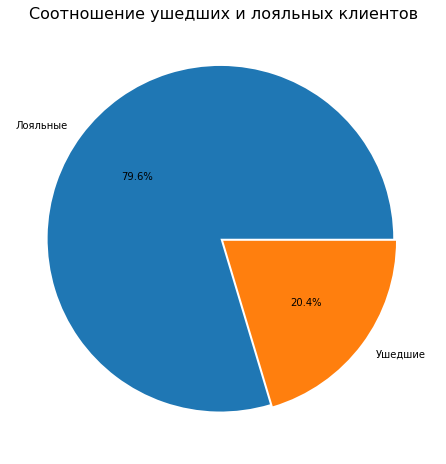

In [11]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(churn['Exited'].value_counts(), labels=('Лояльные', 'Ушедшие'), autopct='%1.1f%%', explode = [0.02, 0])
title = ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

# Выводы: Клиенты находятся в одном банке, они являются частью целого, наглядно соотношение можно показать круговой диаграммой
# Лояльных клиентов 79,6%, ушедших 20,4%

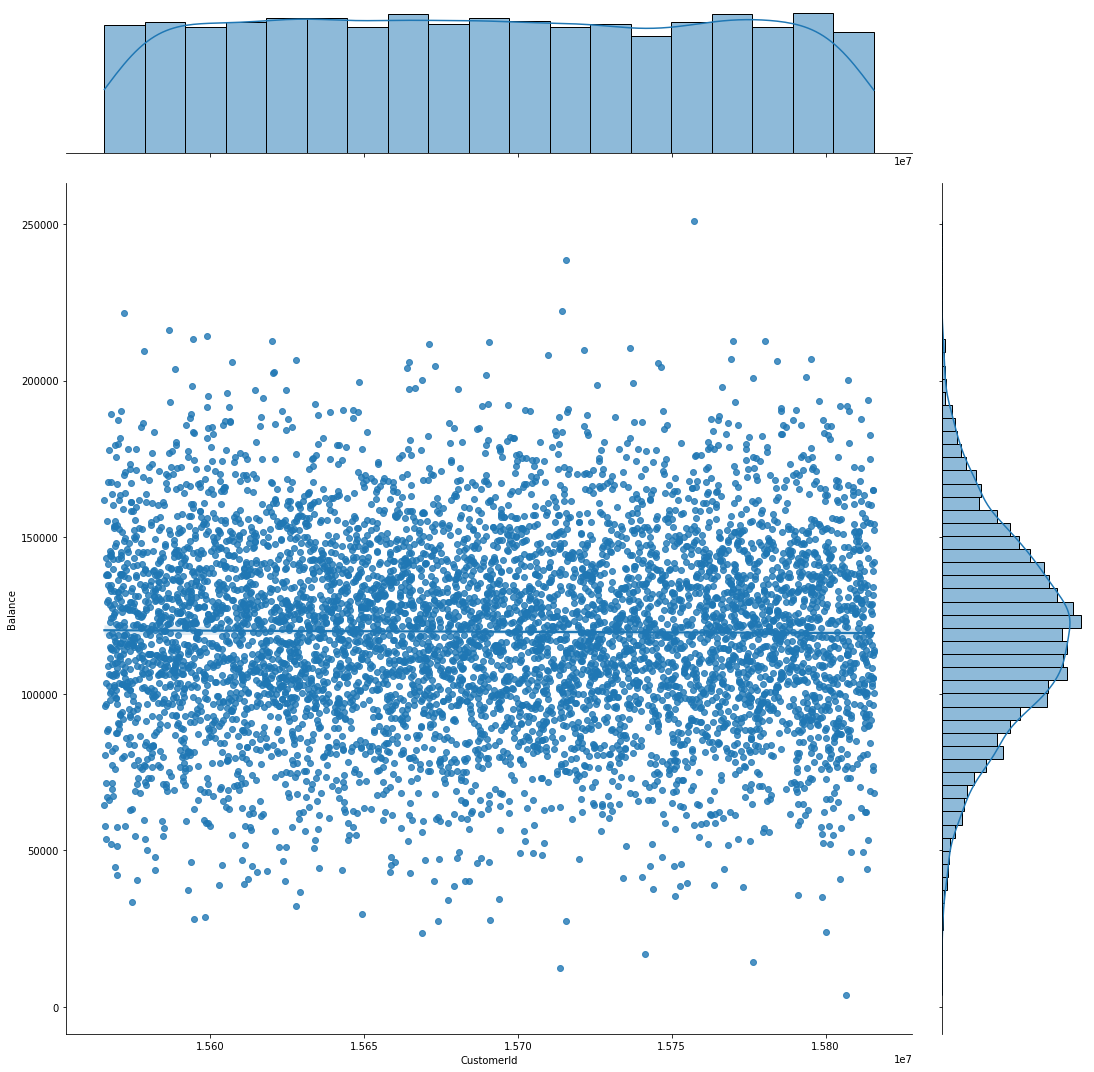

In [18]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

import seaborn as sns
sns.jointplot(data=(churn[churn.Balance  >= 2500]), x="CustomerId", y="Balance", kind="reg", height = 15)
# Выводы: У основной части пользователей, у которых на счету больше 2500 долларов баланс находится в диапазоне от 100 000 до 150 000, выбросы от 0 до 50 000 и от 200 000 до 250 000 встречаются значительно реже.

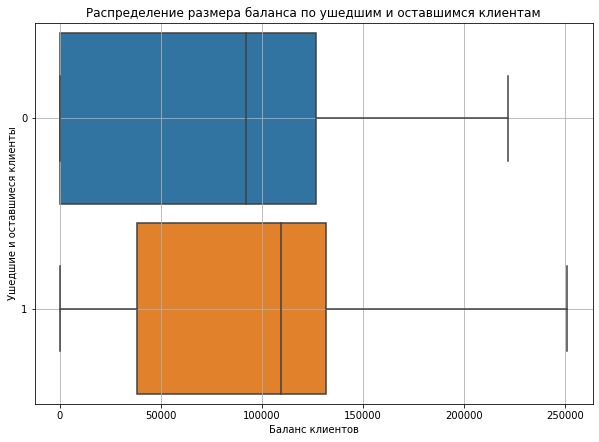

In [ ]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,7))
boxplot = sns.boxplot(data = churn, y = 'Exited', x = 'Balance', orient = 'h', width = 0.9)
boxplot.set_title('Распределение размера баланса по ушедшим и оставшимся клиентам');
boxplot.set_xlabel('Баланс клиентов');
boxplot.set_ylabel('Ушедшие и оставшиеся клиенты');
boxplot.grid()

# Выводы: У ушедших клиентов встречается баланс близкий к нулю и в целом баланс ниже, чем у лояльных клиентов, даже учитывая выбросы.
# Это может быть связано со стабильностью клиентов в целом, отсутствием излишков средств и поиском лучших условий в других банках.

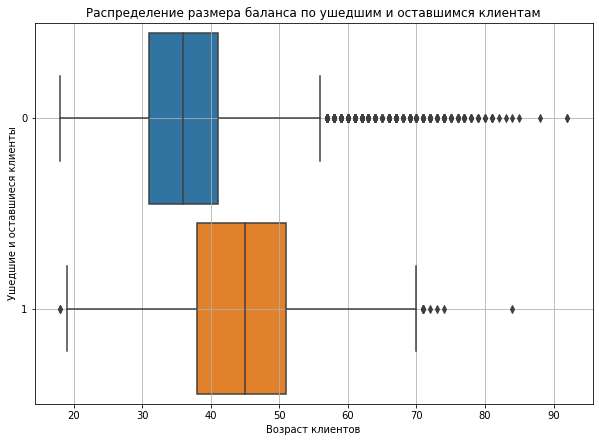

In [ ]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,7))
boxplot = sns.boxplot(data = churn, y = 'Exited', x = 'Age', orient = 'h', width = 0.9)
boxplot.set_title('Распределение размера баланса по ушедшим и оставшимся клиентам');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Ушедшие и оставшиеся клиенты');
boxplot.grid()

# Выводы: Потенциальных выбросов больше в группе ушедших клиентов, Стоит обратить внимание на группу от 30 до 40 лет, как наиболее близкую к лояльным клиентам. 

In [34]:
churn.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [35]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
import plotly.express as px

px.ecdf(churn, x="CreditScore", y="EstimatedSalary",  color = 'Exited')
# Выводы: Предполагаемая зарплата ушедших клиетнов несоклько выше чем у лояльных, 
        # Кредитный рейтинг ушедших клиентов имеет нижнее значение 350, у лояльных не ниже 405


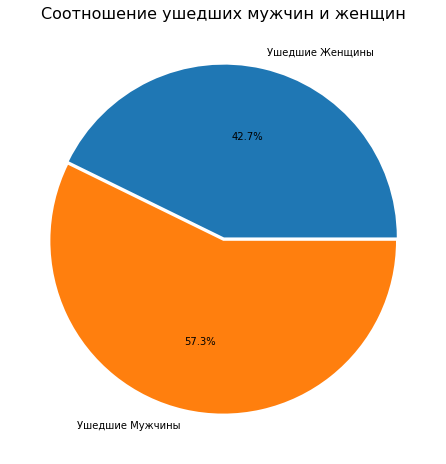

In [36]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(churn[churn.Exited == 0].groupby('Gender')['Exited'].value_counts(), labels=('Ушедшие Женщины', 'Ушедшие Мужчины'), autopct='%1.1f%%', explode = [0.02, 0])
title = ax.set_title('Соотношение ушедших мужчин и женщин', fontsize=16)
# Вывод: Чаще уходят мужчины

In [37]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import plotly.express as px
px.histogram(churn, x = 'Exited',  color = 'NumOfProducts')
# Выводы: У лояльных клиентов приобретенных у банка услуг больше, но их количество меньше, у ушедших чаще встречаютя 3-4 услуги. 

In [ ]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Не Активные клиетны', 'Активные клиенты'], values=churn[churn.Exited ==1]['IsActiveMember'].value_counts(), hole=.3, textinfo='label+percent', insidetextorientation='radial', 
                     marker=dict(colors=['blue', 'red'], line=dict(color='#000000', width=2))), 1, 2)

fig.add_trace(go.Pie(labels=['Активные клиетны', 'Не Активные клиенты'], values=churn[churn.Exited ==0]['IsActiveMember'].value_counts(), hole=.3, textinfo='label+percent', insidetextorientation='radial', 
                     marker=dict(colors=['red', 'blue'], line=dict(color='#000000', width=2))), 1, 1)

fig.update_layout(
    title_text="Влияние статуса активного клиента на отток клиентов", title_xref = 'paper',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Лояльные', x=0.19, y=0.5, font_size=16, showarrow=False),
                 dict(text='Ушедшие', x=0.81, y=0.5, font_size=16, showarrow=False)],
                  showlegend=False)

# Выводы: # Процент ушедших клиентов имеющих статус активного клиента 36,1%', в то время как у лояльных клиентов процент активных клиентов 55,5%. 
# Рекомендация банку: повышать активность клиентов, больше выгодных предложение, акций, улучшение условий и прочих банковских событий.

In [46]:
# В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
import plotly.express as px
import pandas as pd

fig = px.choropleth(
    data_frame = (pd.DataFrame(dict(churn[churn.Exited == 1].Geography.value_counts()*100/churn.Geography.value_counts()).items(), columns=['Country', 'ExitedSum'])),
    locations = 'Country',locationmode = 'country names',range_color=[0, 35],color= 'ExitedSum',color_continuous_scale="bluered", 
    title = 'Доля ушедших клиентов по странам', scope="europe", width = 900, height=600, center={'lat': 47, 'lon': 2})
fig.show()
# Выводы: Доля ушедших клиентов в Германии - 32,44%, что в два раза превышает данный показатель для Испании и Франции. Возможно связано с событиями внутри страны.

<Axes: xlabel='Tenure', ylabel='CreditScoreCat'>

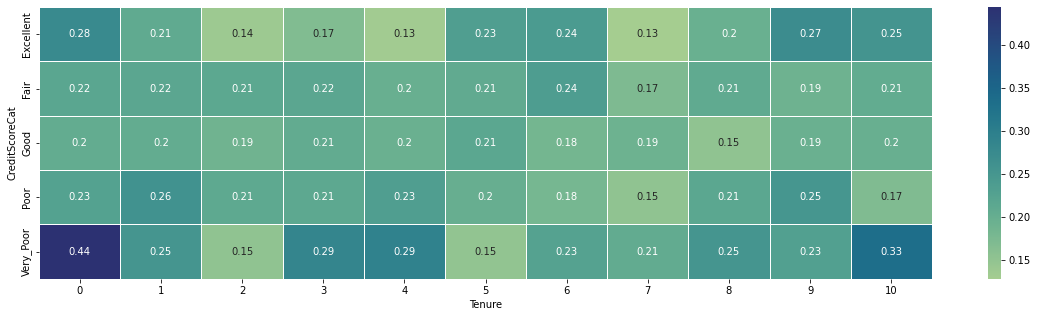

In [72]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(churn.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean'), annot = True, linewidth=.5, cmap="crest") #vmin = 0.27

# Выводы: категории кредитного рейтинга которые уходят чаще всего: Very_Poor с продолжительностью нахождением в банке до года.
